In [25]:
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import mplfinance as mpf

BTC_NAV=0.00095059
ETH_NAV=0.01030231
BCH_NAV=0.00932072
ETC_NAV=0.89578108
LTC_NAV=0.09320723

columns = ['Percent Cost', 'Percent SP', 'Percent', 'Close', 'Value']

%matplotlib inline

In [5]:
def get_ticker_history(ticker, period='3y', interval='1d'):
    t = yf.Ticker(ticker)
    return t.history(period=period, interval=interval)

def get_crypto_and_stock(crypto_ticker, stock_ticker, crypto_per_share, period='3y', interval='1d'):
    crypto = get_ticker_history(crypto_ticker, period=period, interval=interval)
    stock = get_ticker_history(stock_ticker, period=period, interval=interval)    

    df = pd.DataFrame({'Value': crypto['Close'] * crypto_per_share})
    df1 = pd.DataFrame({'Percent': (stock['Close'] - df['Value']) / stock['Close']})
    df2 = stock.join([df, df1]).dropna()

    return (crypto[crypto.index >= df2.index[0]], df2)

def get_gbtc(period='5y', interval='1d'):
    return get_crypto_and_stock('BTC-USD', 'GBTC', BTC_NAV, period=period, interval=interval)

def get_bchg(period='3y', interval='1d'):
    return get_crypto_and_stock('BCH-USD', 'BCHG', BCH_NAV, period=period, interval=interval)

def get_ethe(period='3y', interval='1d'):
    return get_crypto_and_stock('ETH-USD', 'ETHE', ETH_NAV, period=period, interval=interval)

def get_etcg(period='3y', interval='1d'):
    return get_crypto_and_stock('ETC-USD', 'ETCG', ETC_NAV, period=period, interval=interval)

def get_ltcn(period='3y', interval='1d'):
    return get_crypto_and_stock('LTC-USD', 'LTCN', ETC_NAV, period=period, interval=interval)

def get_close_prices(crypto, stock):
    df = pd.DataFrame({'Crypto Close': crypto['Close'], 'Stock Close': stock['Close']}).dropna()
    comp = df.pct_change().dropna()
    return pd.DataFrame({'Crypto Close': df['Crypto Close'],
                         'Stock Close': df['Stock Close'],
                         'Crypto Percent': comp['Crypto Close'],
                         'Stock Percent': comp['Stock Close'],
                         'Stock Gain': comp['Stock Close'] - comp['Crypto Close'],
                         'Stock Outperform': comp['Stock Close'] > comp['Crypto Close'],
                        }).dropna()

def buy_at_25(df, df_sp500, cost=10000):
    df_sp = df_sp500[(df_sp500.index >= df.index[0]) & (df_sp500.index <= df.index[-1])]
    buy_point = df['Percent'] <= df['Percent'].describe()['25%']
    cur_price = df.iloc[-1]['Close']
    cur_price_sp = df_sp.iloc[-1]['Close']
    
    shares = cost / df[buy_point]['Close']
    shares_sp = cost / df_sp[buy_point]['Close']
    values = cur_price * shares
    values_sp = cur_price_sp * shares_sp
    
    df1 = pd.DataFrame({'Shares': shares,
                        'Values': values,
                        'Values SP': values_sp,
                        'Percent Cost': (values - cost) / cost,
                        'Percent SP': (values - values_sp) / values_sp
                       })
    return df1.join(df)

def buy_strategy(df, percentiles=[0.1,0.25,0.3,0.4,0.5]):
    percents = df['Percent'].quantile(percentiles)
    return pd.DataFrame({'Percent': percents, 'Price': df.iloc[-1]['Value'] / (1 - percents)})

def buy_if(df, crypto_price):
    pd.Series()

def draw_candlestick(df, title):
    mpf.plot(df, type='candle', style='yahoo', mav=(5,20,60), volume=True, figsize=(18, 8), title=title)

def draw_premium(df):
    df['Value'].plot(label='Crypto Value', figsize=(18,8))
    df['Close'].plot(label='Stock Value')
    plt.legend()
    plt.show()

def draw_premium_percentage(df):
    plt.ylim([-0.25,1.0])
    df['Percent'].plot.area(figsize=(18,8))
    plt.title('Premium percentage')
    plt.show()

def draw_premium_with_percentage(df, kind='area'):
    fig = plt.figure(figsize=(18,8))
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan=5, colspan=1)
    ax1.get_xaxis().set_visible(False)    
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan=3, colspan=1, sharex=ax1)
    df['Value'].plot(ax=ax1, label='Crypto Close')
    df['Close'].plot(ax=ax1, label='Stock Close')
    df['Percent'].plot(ax=ax2, kind=kind)
    ax1.legend()

In [63]:
btc, gbtc = get_crypto_and_stock('BTC-USD', 'GBTC', BTC_NAV, period='5y')

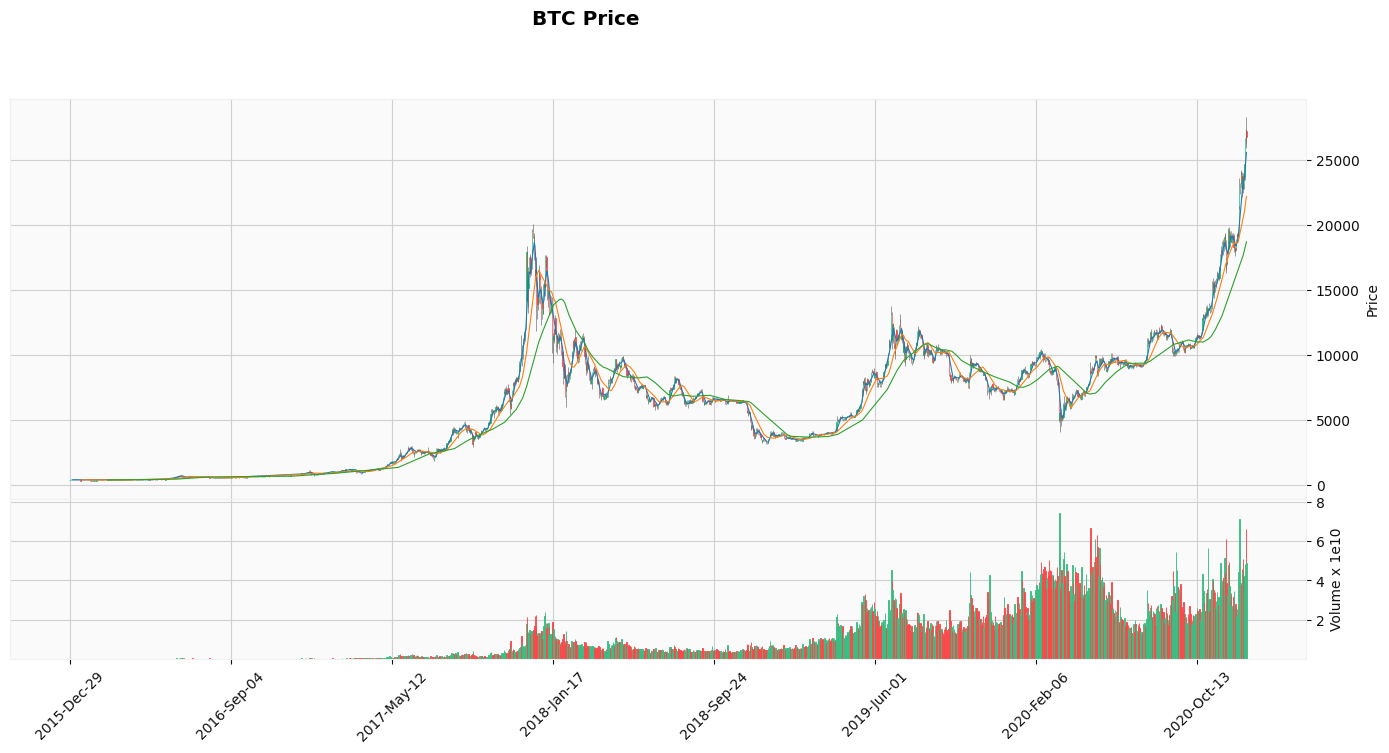

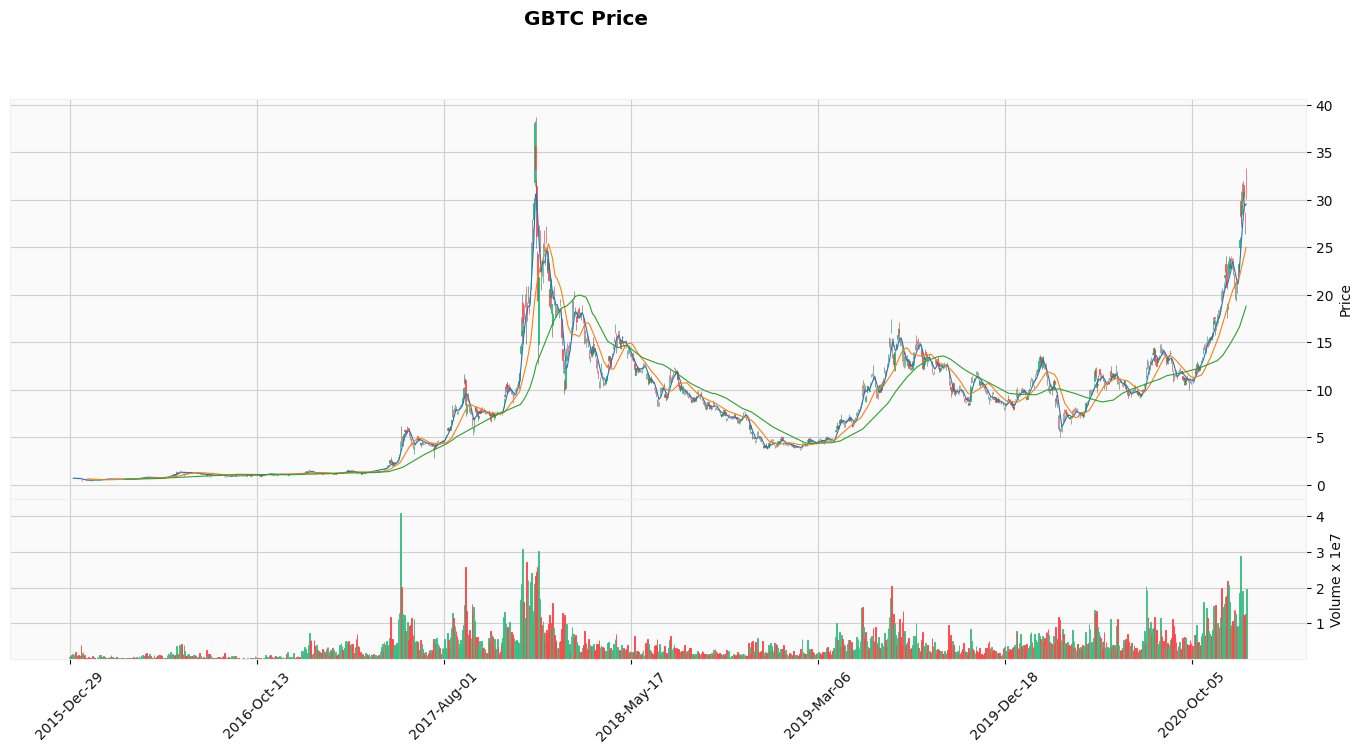

In [66]:
%matplotlib inline
draw_candlestick(btc, 'BTC Price')
draw_candlestick(gbtc, 'GBTC Price')

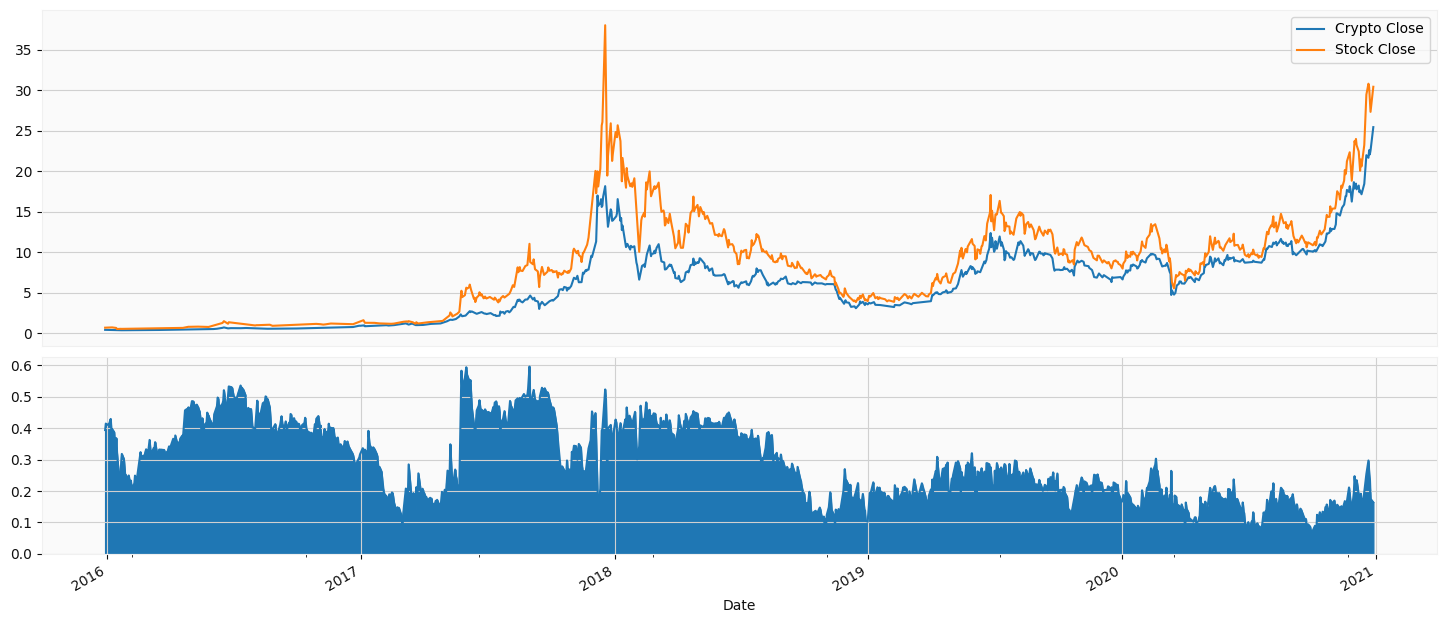

In [67]:
draw_premium_with_percentage(gbtc)

In [64]:
eth, ethe = get_crypto_and_stock('ETH-USD', 'ETHE', ETH_NAV, period='3y')

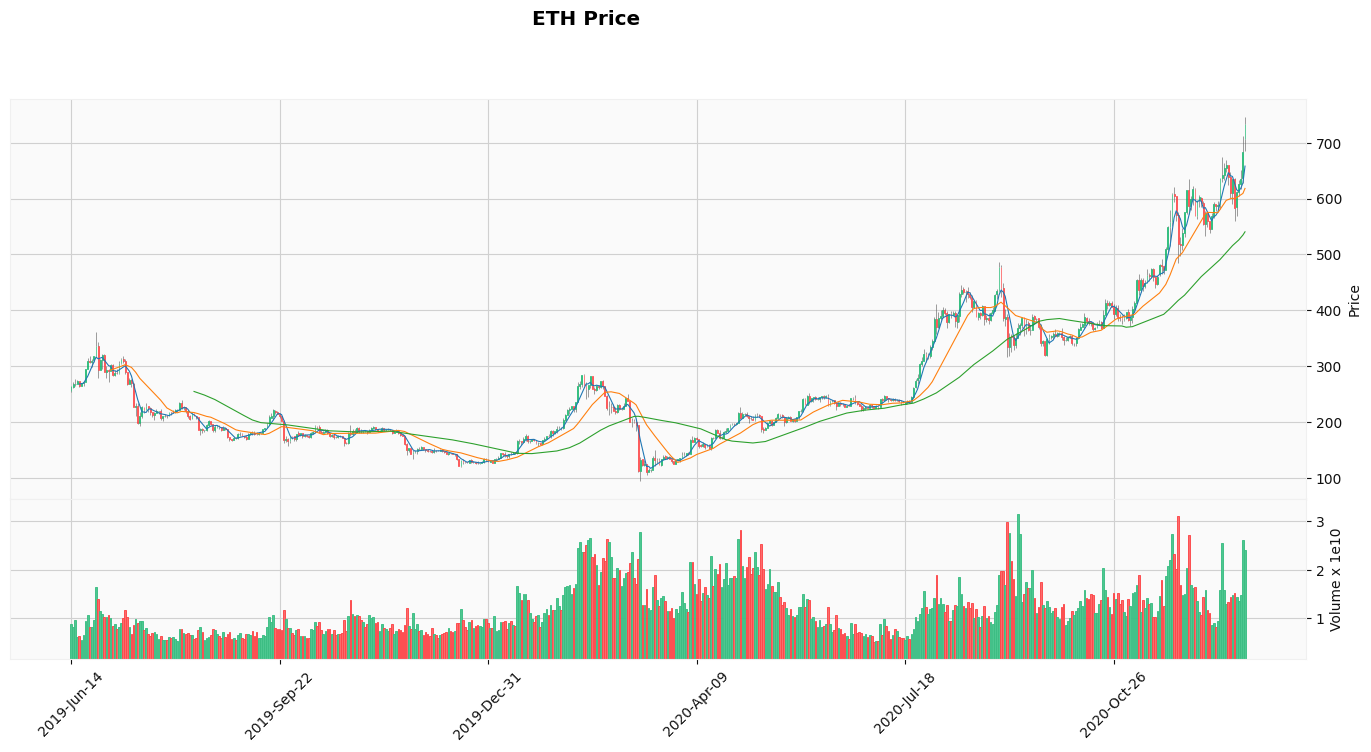

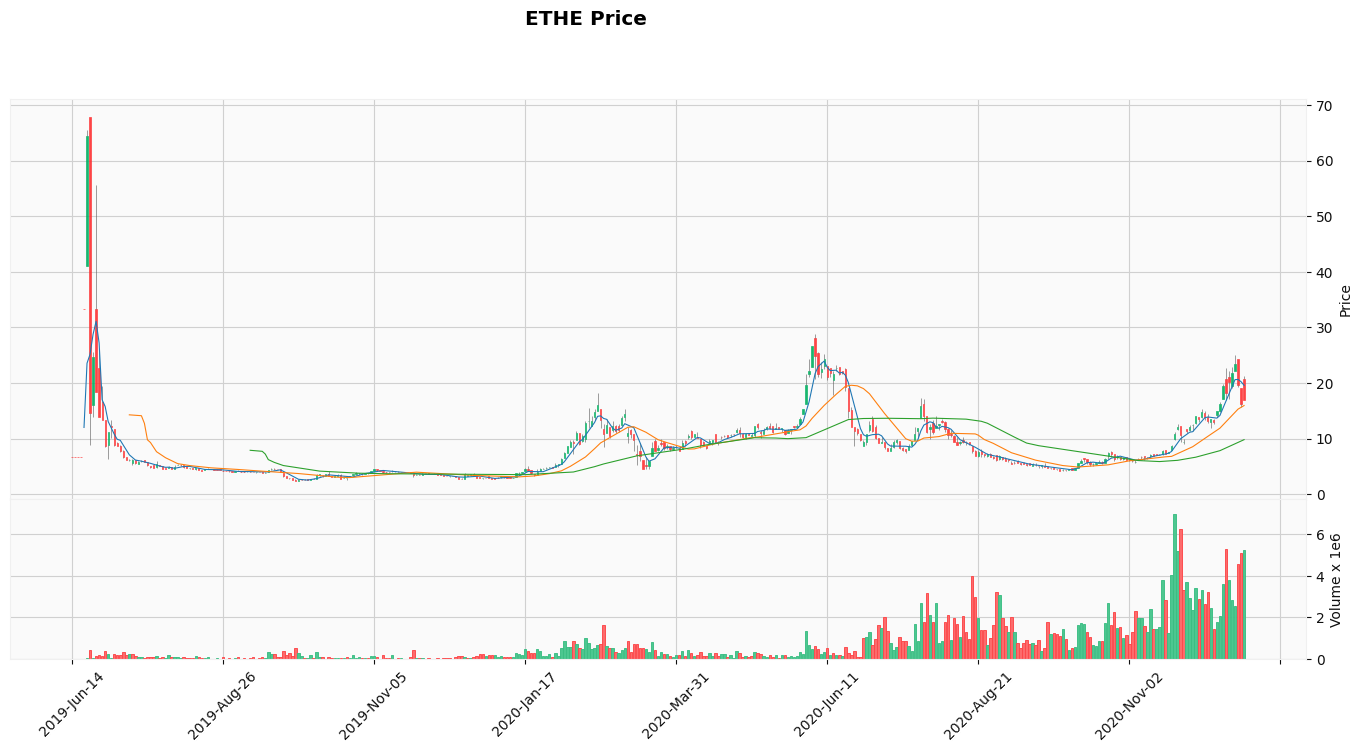

In [65]:
%matplotlib inline
draw_candlestick(eth, 'ETH Price')
draw_candlestick(ethe, 'ETHE Price')

count    389.000000
mean       0.589764
std        0.185245
min        0.128419
25%        0.480700
50%        0.566408
75%        0.776063
max        0.952855
Name: Percent, dtype: float64

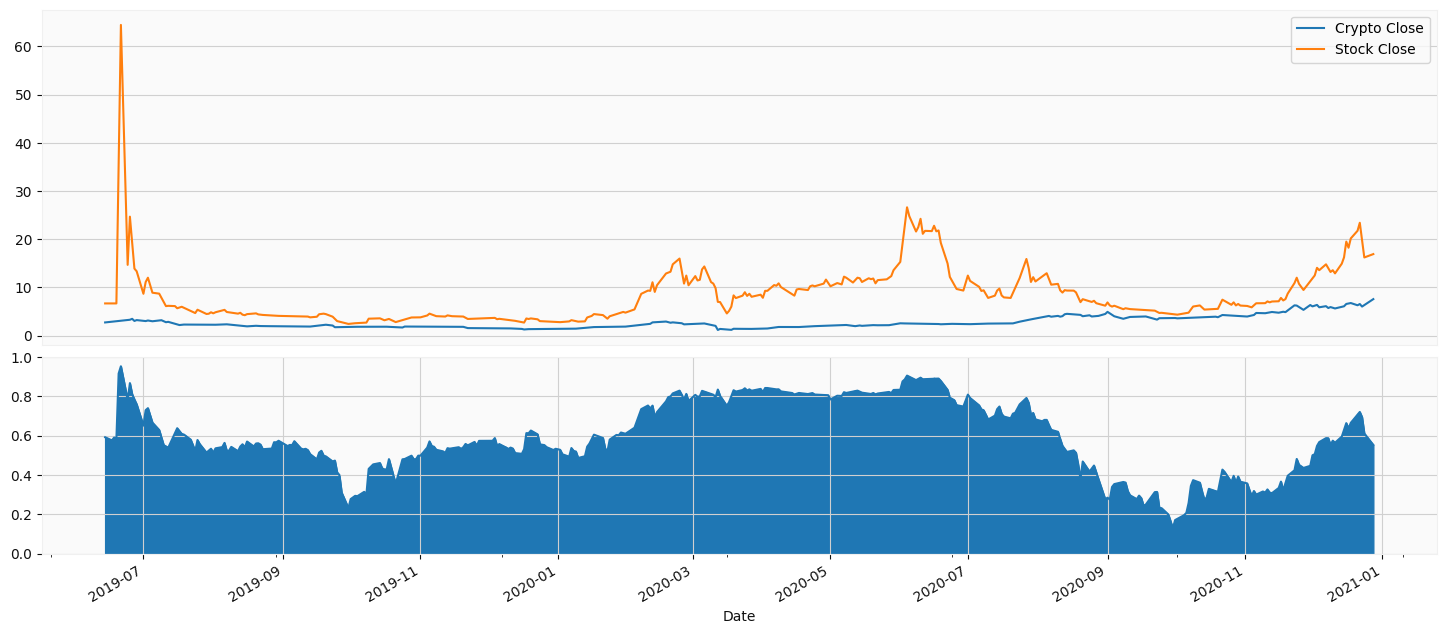

In [68]:
draw_premium_with_percentage(ethe)
ethe['Percent'].describe()

In [12]:
bch, bchg = get_crypto_and_stock('BCH-USD', 'BCHG', BCH_NAV, period='3y')

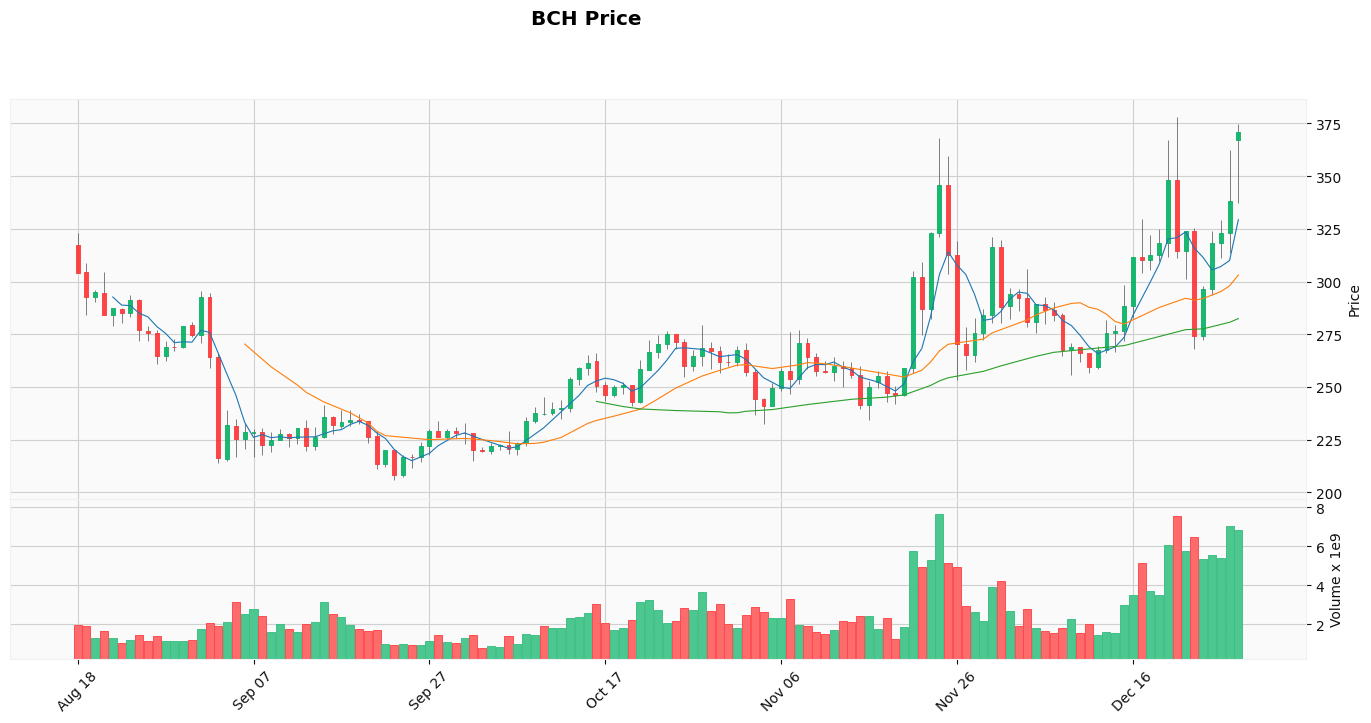

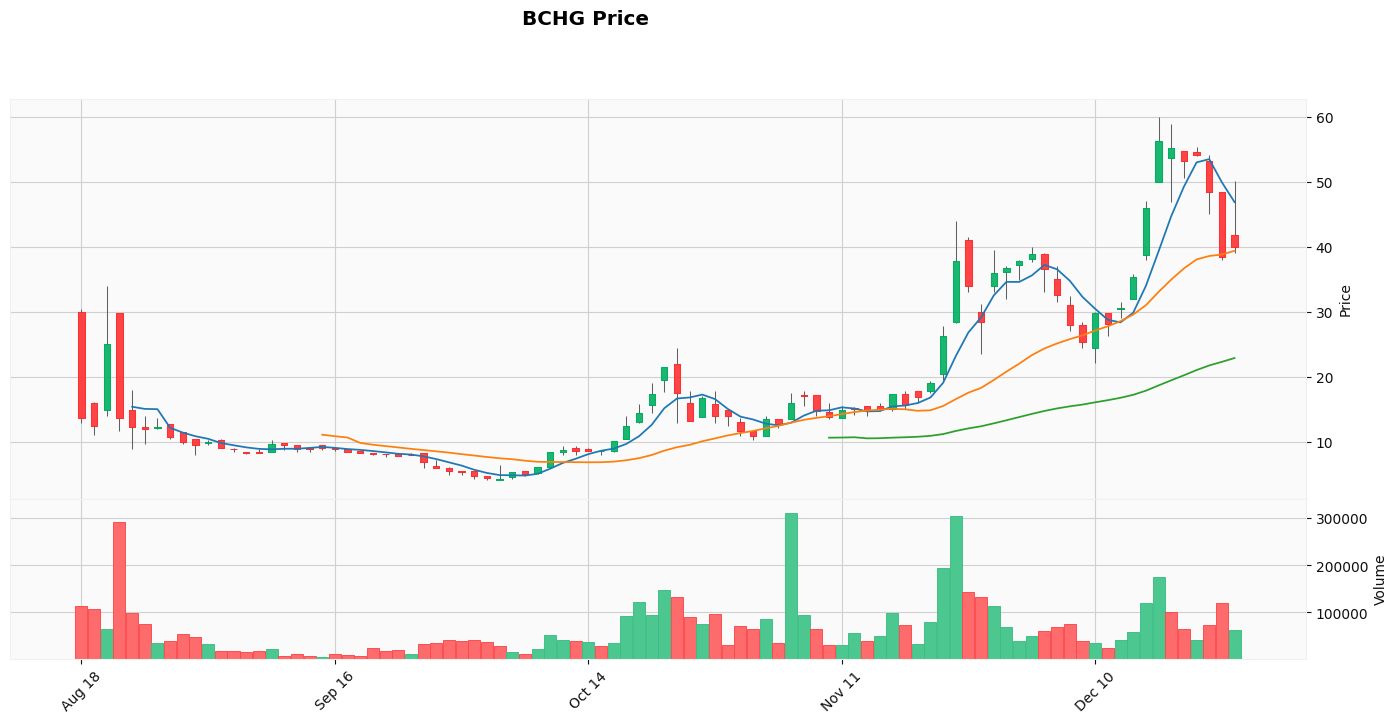

In [13]:
%matplotlib inline
draw_candlestick(bch, 'BCH Price')
draw_candlestick(bchg, 'BCHG Price')

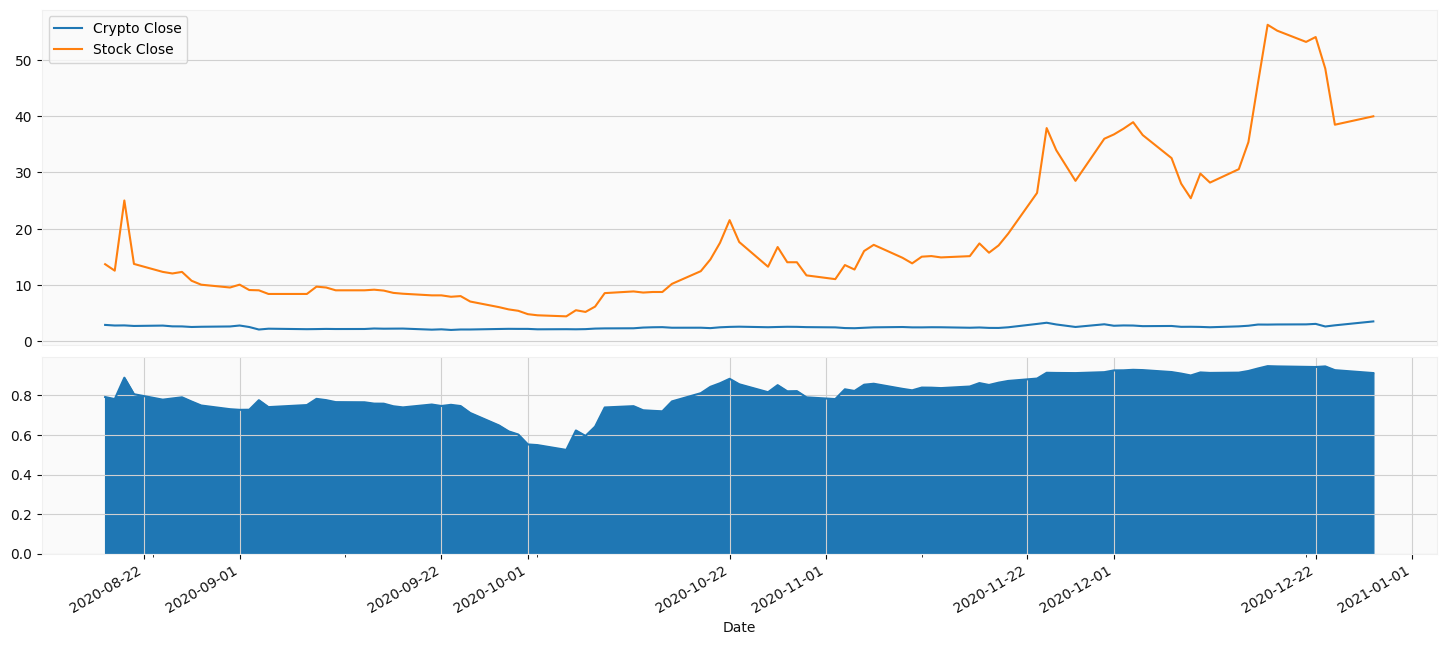

In [14]:
draw_premium_with_percentage(bchg)

In [15]:
etc, etcg = get_crypto_and_stock('ETC-USD', 'ETCG', ETC_NAV, period='3y')

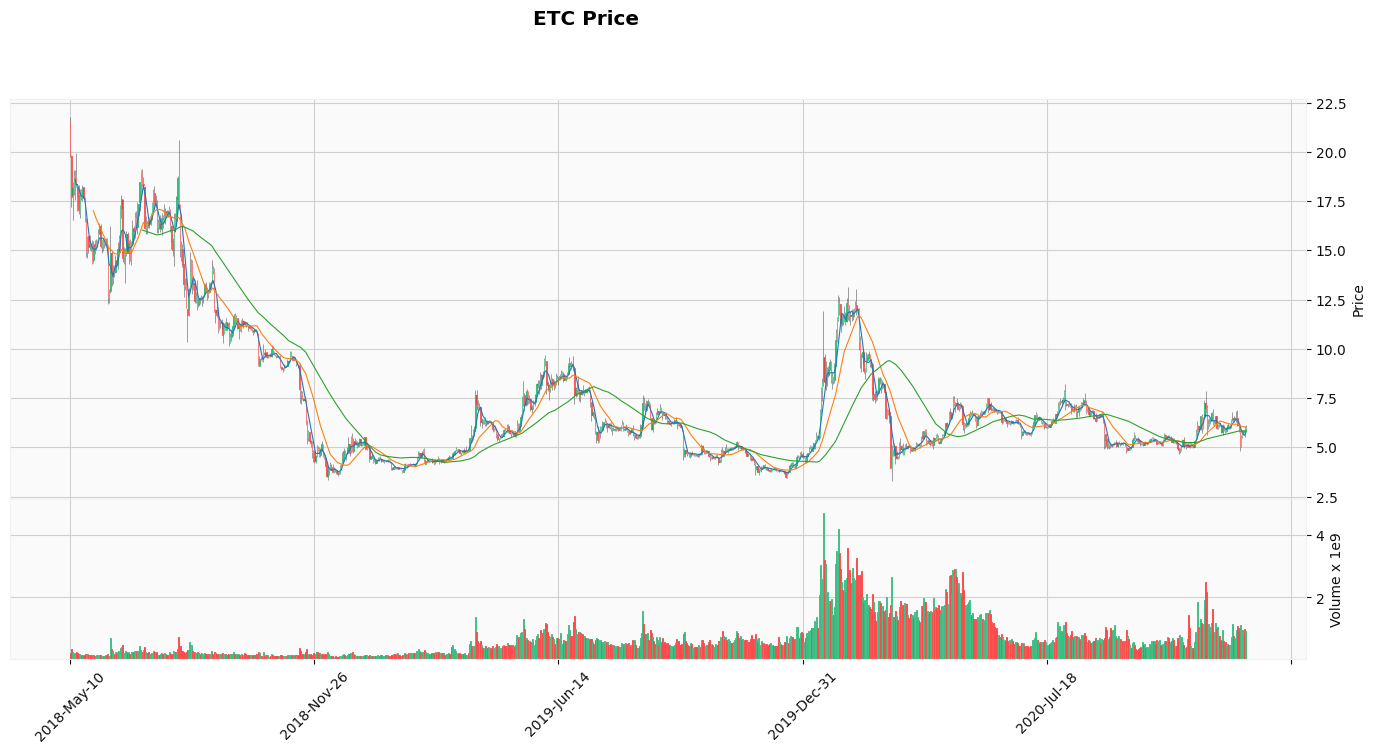

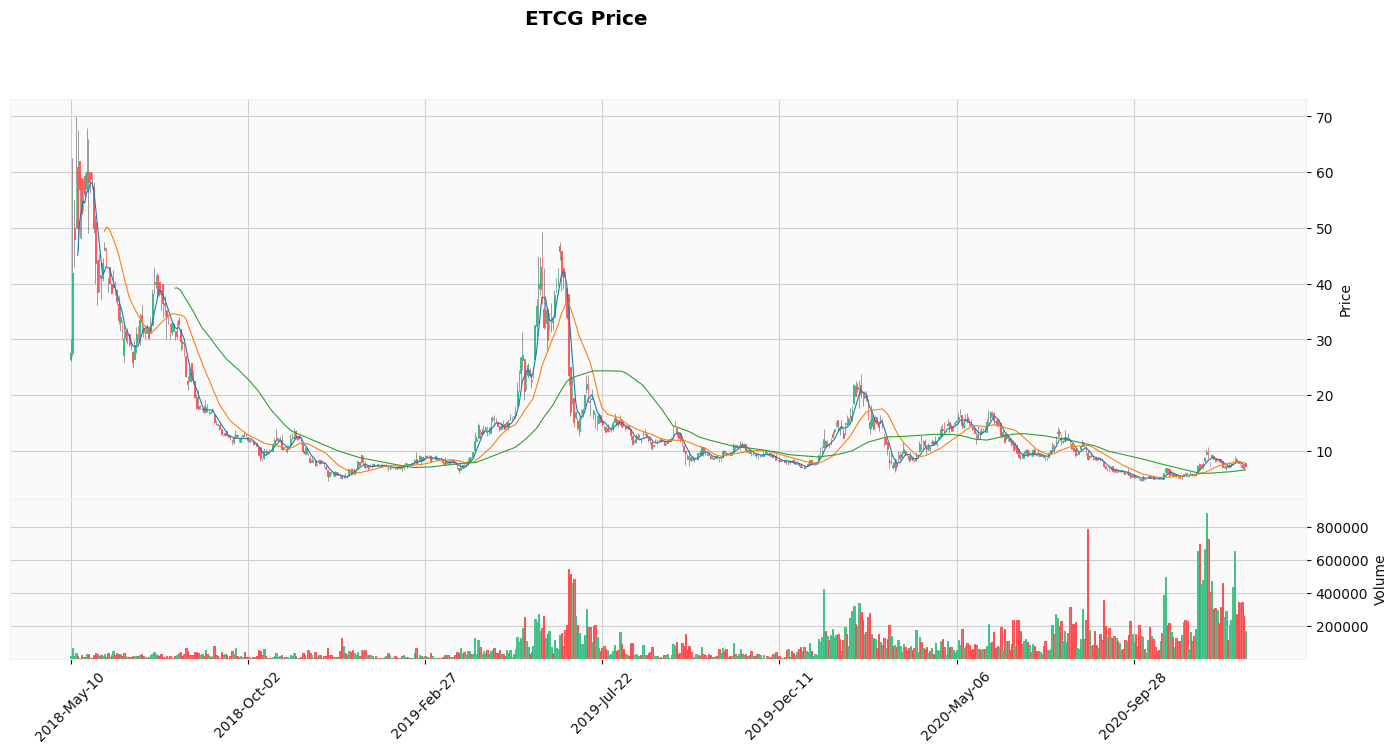

In [16]:
%matplotlib inline
draw_candlestick(etc, 'ETC Price')
draw_candlestick(etcg, 'ETCG Price')

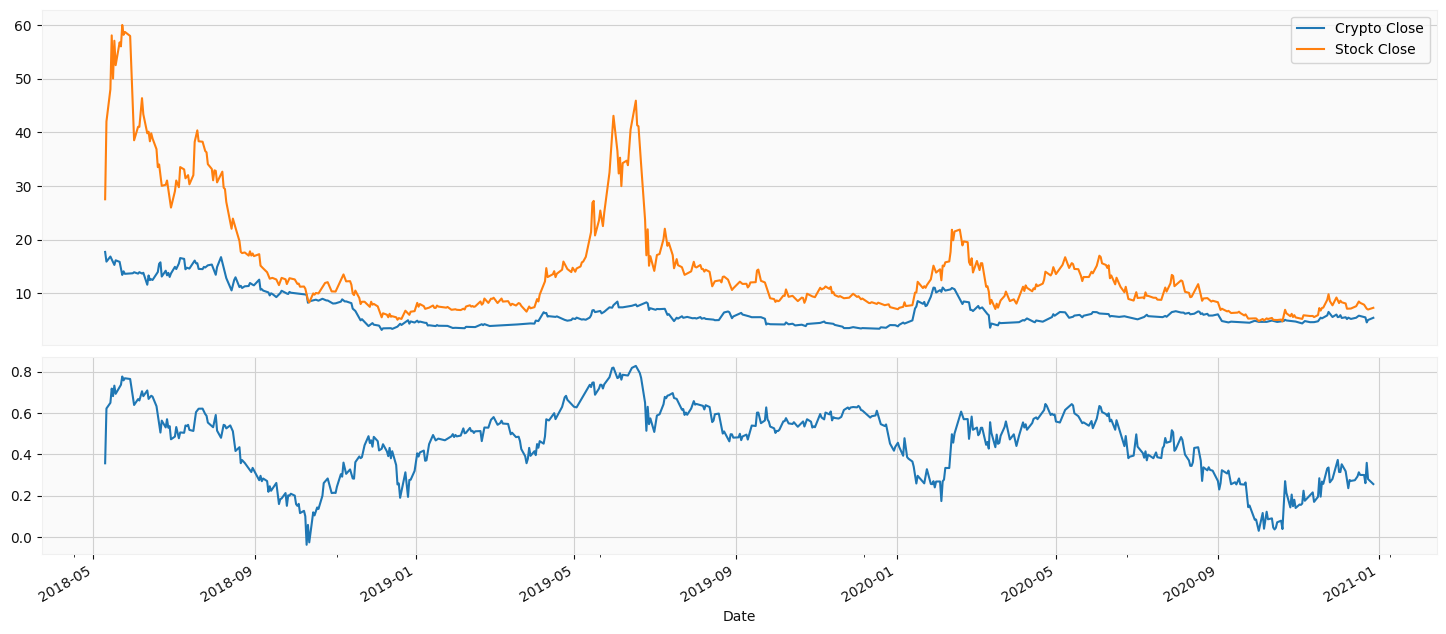

In [17]:
draw_premium_with_percentage(etcg, kind='line')

In [18]:
ltc, ltcn = get_crypto_and_stock('LTC-USD', 'LTCN', LTC_NAV, period='3y')

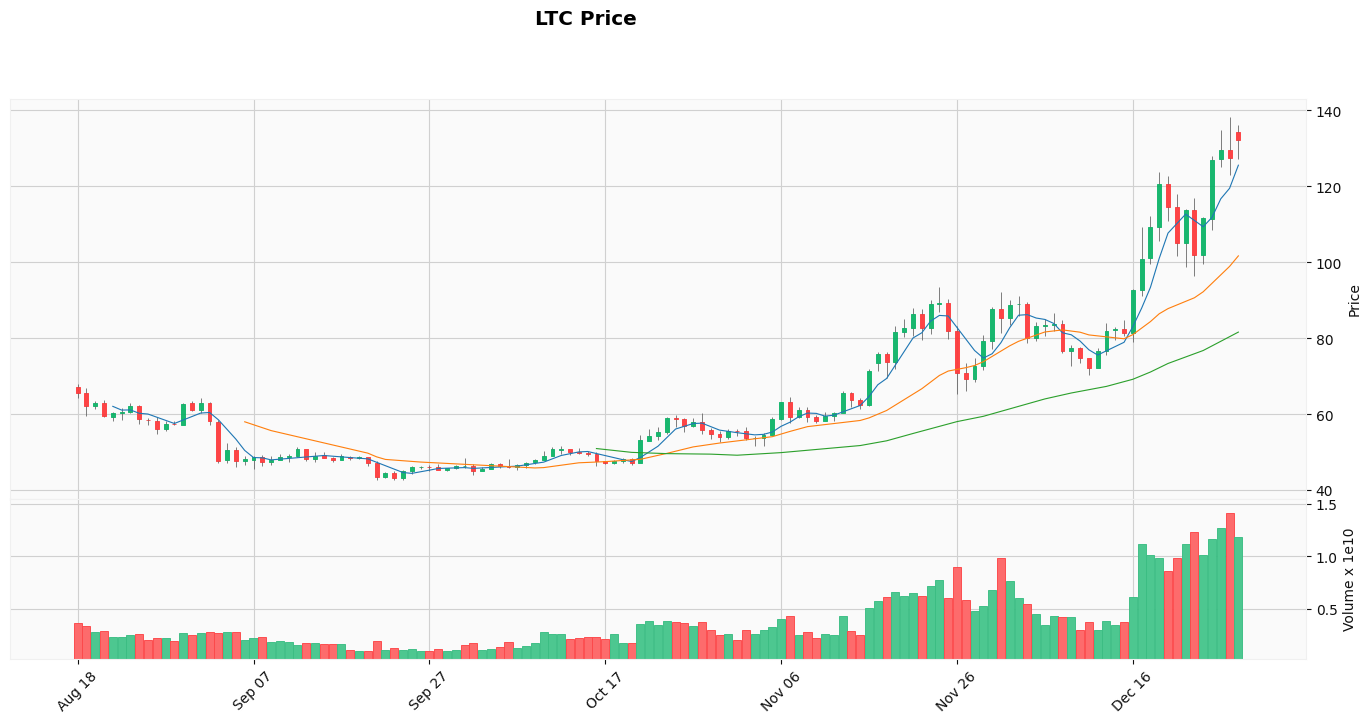

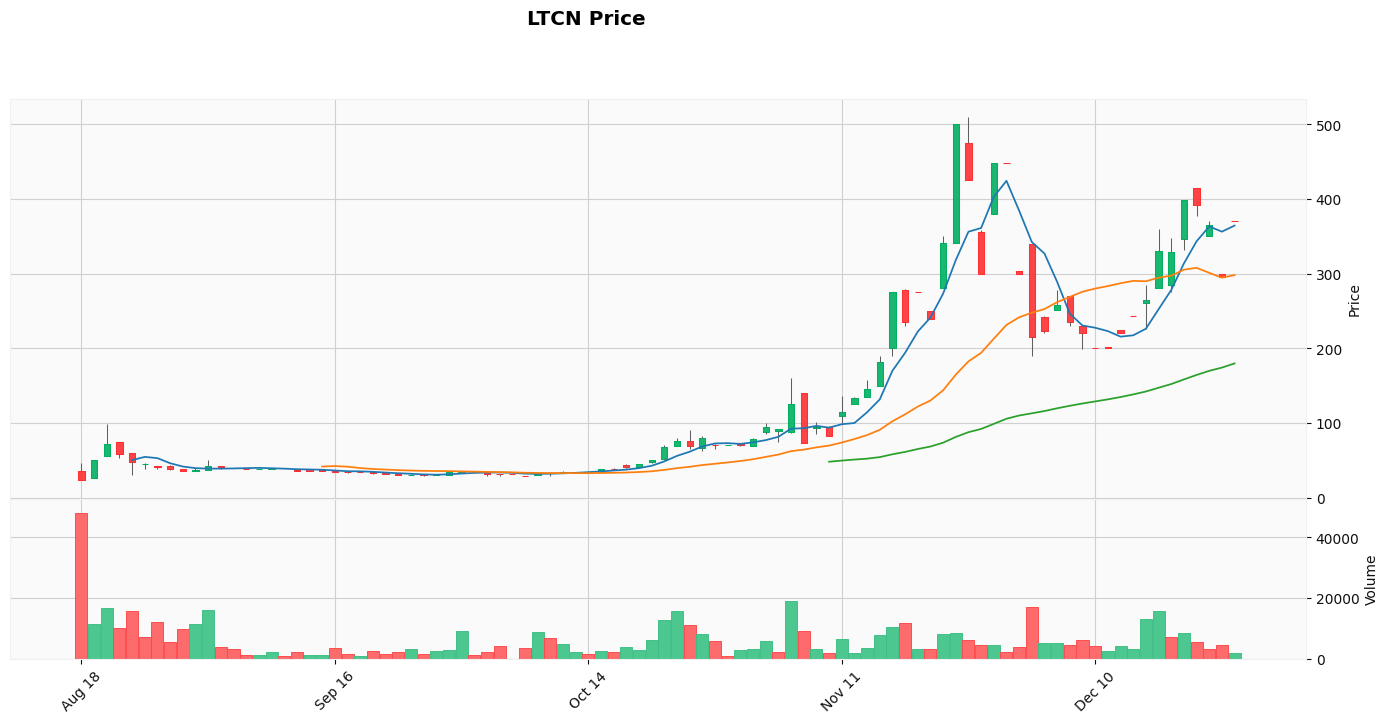

In [19]:
%matplotlib inline
draw_candlestick(ltc, 'LTC Price')
draw_candlestick(ltcn, 'LTCN Price')

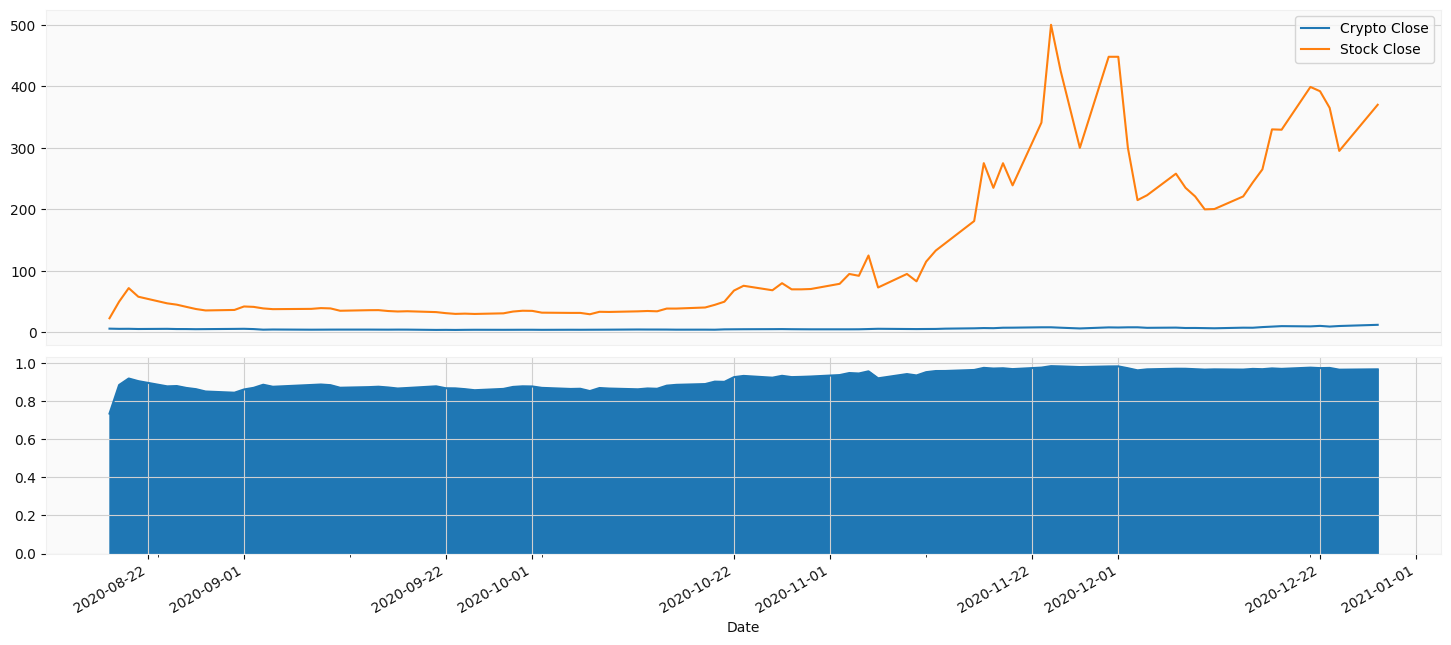

In [20]:
draw_premium_with_percentage(ltcn)

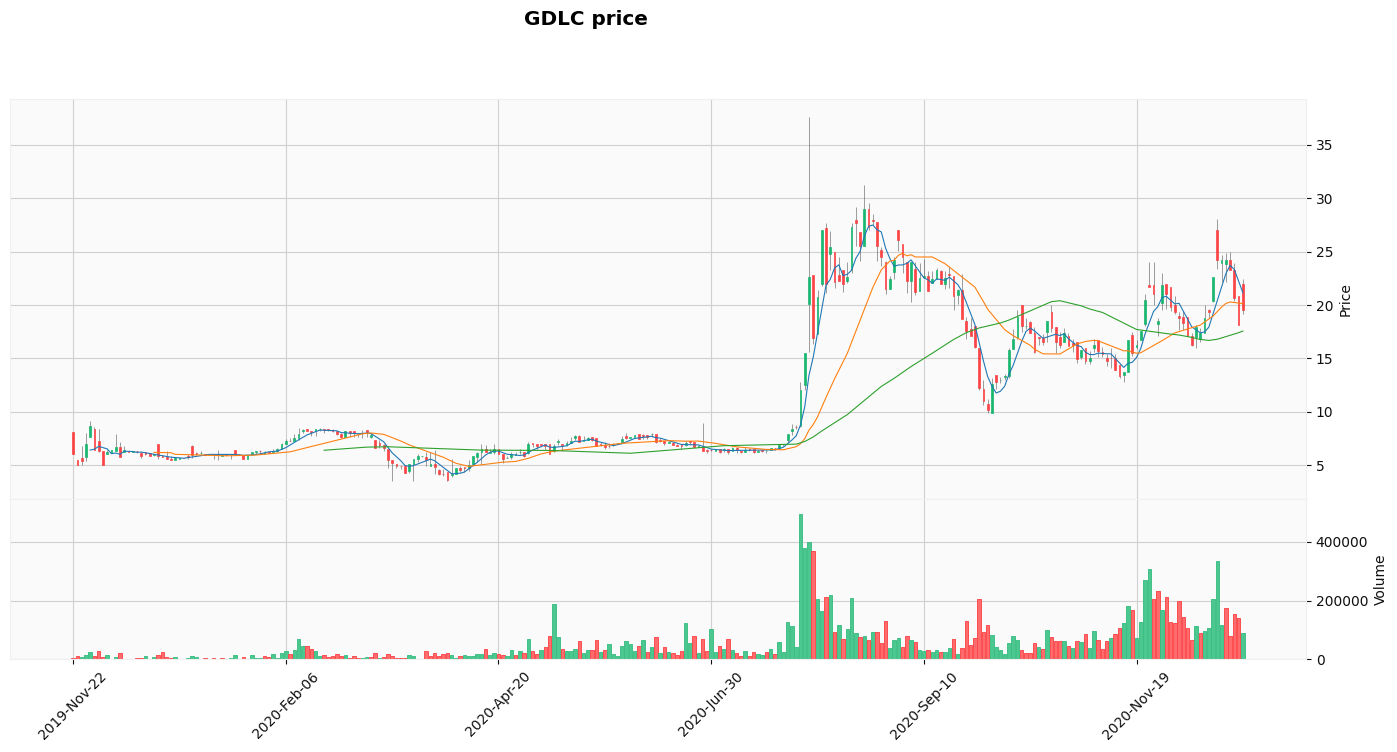

In [21]:
gdlc = get_ticker_history('GDLC')
draw_candlestick(gdlc, 'GDLC price')

In [22]:
gbtc[gbtc['Percent'] == gbtc['Percent'].min()]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Value,Percent
Date,,,,,,,,,
2020-04-01,6.8,6.9,6.41,6.495,4274800.0,0.0,0.0,6.280336,0.033051


In [23]:
gbtc[gbtc['Percent'] < 0.08]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Value,Percent
Date,,,,,,,,,
2020-04-01,6.80,6.900,6.41,6.495,4274800.0,0.0,0.0,6.280336,0.033051
2020-06-29,9.57,9.630,9.18,9.490,4671200.0,0.0,0.0,8.736734,0.079375
2020-07-02,9.87,9.870,9.25,9.370,4585900.0,0.0,0.0,8.672622,0.074427
2020-07-15,9.73,9.730,9.44,9.470,1985900.0,0.0,0.0,8.738619,0.077231
2020-07-16,9.31,9.470,9.30,9.310,2400700.0,0.0,0.0,8.681004,0.067561
2020-07-20,9.58,9.600,9.25,9.420,2752400.0,0.0,0.0,8.711427,0.075220
2020-09-29,11.14,11.200,10.85,11.030,3976900.0,0.0,0.0,10.312789,0.065024
2020-09-30,10.90,11.100,10.00,10.970,3837200.0,0.0,0.0,10.254602,0.065214
2020-10-01,11.20,11.265,10.66,10.870,5354100.0,0.0,0.0,10.098431,0.070981


Empty DataFrame
Columns: [Percent Cost, Percent SP, Percent, Close, Value]
Index: []


count    315.000000
mean       3.204665
std        3.685132
min        0.000000
25%        1.327763
50%        1.707533
75%        3.253057
max       14.582772
Name: Percent SP, dtype: float64

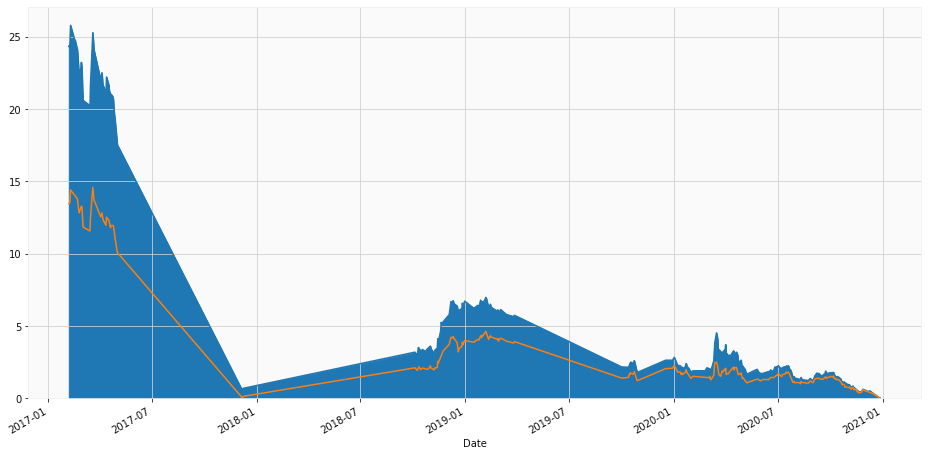

In [26]:
spy = get_ticker_history('SPY', '5y')
df = buy_at_25(gbtc, spy, cost=10000)
df['Percent Cost'].plot(kind='area', figsize=(16, 8))
df['Percent SP'].plot(kind='line', figsize=(16, 8))
df['Percent SP'].describe()
print(df[df['Percent SP'] < 0][columns])
df['Percent SP'].describe()

            Percent Cost  Percent SP   Percent  Close     Value
Date                                                           
2019-01-23      6.429612    4.069515  0.172820   4.12  3.407982
2019-01-25      6.305489    4.029672  0.183317   4.19  3.421901
2019-01-28      6.788804    4.321668  0.160566   3.93  3.298975
2019-01-29      6.614428    4.195622  0.184640   4.02  3.277745
2019-01-30      6.539409    4.225875  0.183761   4.06  3.313929
2019-01-31      6.671679    4.364258  0.176205   3.99  3.286943
2019-02-01      6.614428    4.326790  0.175222   4.02  3.315606
2019-02-04      6.729798    4.445543  0.169637   3.96  3.288237
2019-02-05      6.848718    4.552499  0.155107   3.90  3.295085
2019-02-06      6.971355    4.631823  0.154924   3.84  3.245094
2019-02-07      6.909561    4.534895  0.164986   3.87  3.231504
2019-02-11      6.236407    4.072837  0.180104   4.23  3.468162
2019-02-13      6.358173    4.241492  0.170046   4.16  3.452610
2019-02-14      6.502451    4.332412  0.

count    225.000000
mean       1.723835
std        0.995098
min        0.000000
25%        1.218166
50%        1.492122
75%        1.810310
max        4.631823
Name: Percent SP, dtype: float64

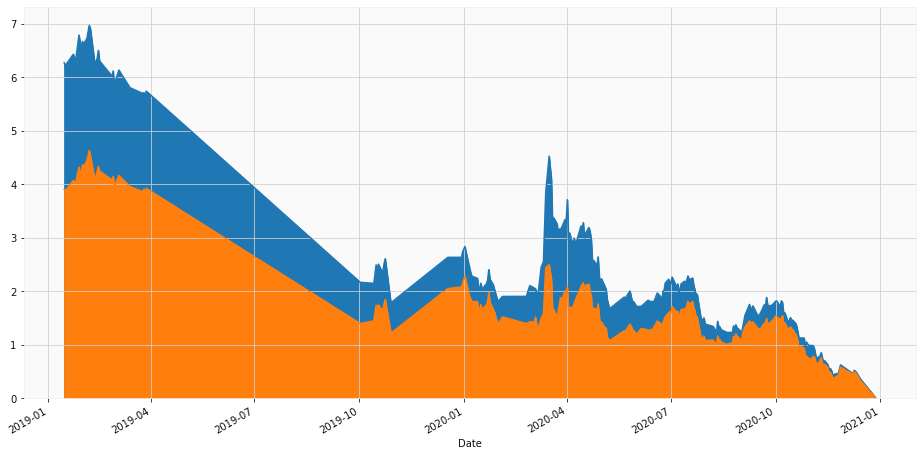

In [27]:
df1 = df.loc[df.index.year >= 2019]
df1['Percent Cost'].plot(kind='area', figsize=(16, 8))
df1['Percent SP'].plot(kind='area', figsize=(16, 8))

print(df1[df1['Percent SP'] >= 4][columns])
print(df1[df1['Percent SP'] == df1['Percent SP'].min()][columns])
df1['Percent SP'].describe()

In [28]:
df.loc[(df.index.year >= 2020) & (df.index.month >= 12)][columns]

,Percent Cost,Percent SP,Percent,Close,Value
Date,,,,,
2020-12-08,0.460401,0.447360,0.169089,20.959999,17.415897
2020-12-09,0.525162,0.497986,0.121217,20.070000,17.637167
2020-12-11,0.485201,0.456550,0.167074,20.610001,17.166614
2020-12-14,0.374495,0.341944,0.178461,22.270000,18.295668
2020-12-24,0.119196,0.110409,0.175022,27.350000,22.563156
2020-12-28,0.000000,0.000000,0.161779,30.610001,25.657937


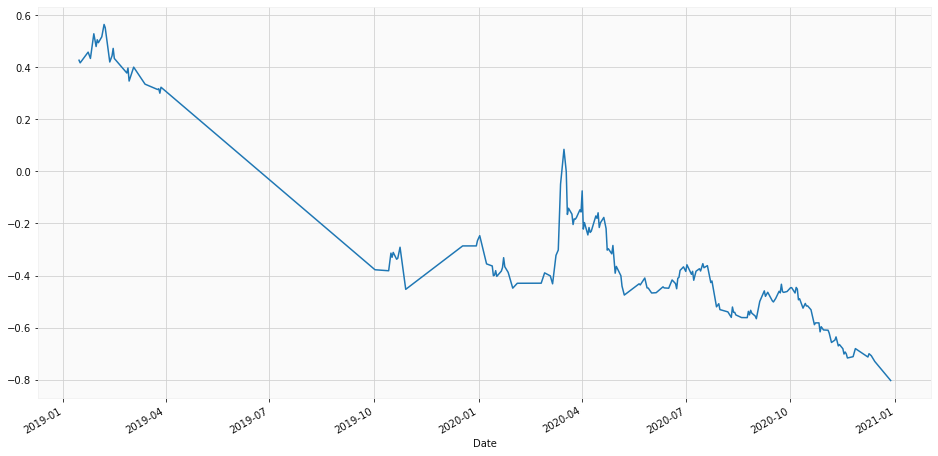

In [29]:
def buy_at_25_bear(df, cost=10000):
    buy_point = df['Percent'] <= df['Percent'].describe()['25%']
    cur_price = gbtc.loc['2020-03-18']['Close']
    shares = cost / df[buy_point]['Close']
    values = cur_price * shares
    
    df1 = pd.DataFrame({'Shares': shares, 'Values': values, 'Percent': (values - cost) / cost})
    return df1
df = buy_at_25_bear(gbtc, cost=10000)
df.loc[df.index.year >= 2019]['Percent'].plot(figsize=(16, 8))

,Crypto Close,Stock Close,Crypto Percent,Stock Percent,Stock Gain
Crypto Close,1.000000,0.963478,0.047007,0.035104,-0.001433
Stock Close,0.963478,1.000000,0.042889,0.058113,0.035595
Crypto Percent,0.047007,0.042889,1.000000,0.709806,-0.082818
Stock Percent,0.035104,0.058113,0.709806,1.000000,0.643192
Stock Gain,-0.001433,0.035595,-0.082818,0.643192,1.000000


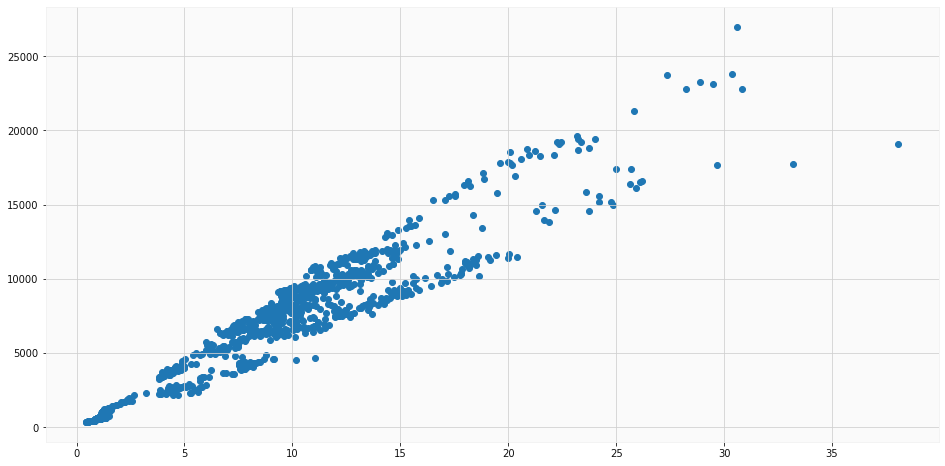

In [30]:
df = get_close_prices(btc, gbtc)
plt.figure(figsize=(16,8))
plt.scatter(df['Stock Close'], df['Crypto Close'])
df.corr()

count    1259.000000
mean        0.000468
std         0.042714
min        -0.244083
25%        -0.021041
50%        -0.001780
75%         0.020752
max         0.358462
Name: Stock Gain, dtype: float64
False    662
True     597
Name: Stock Outperform, dtype: int64


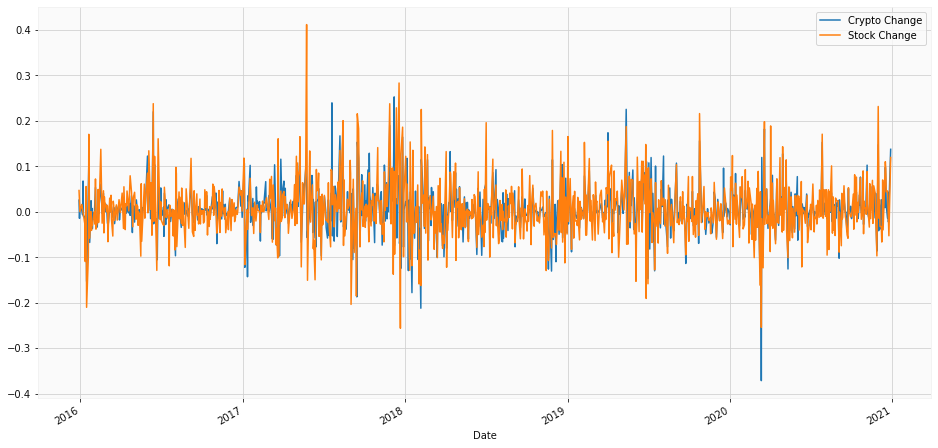

In [31]:
print(df['Stock Gain'].describe())
print(df['Stock Outperform'].value_counts())
df['Crypto Percent'].plot(label='Crypto Change', figsize=(16,8))
df['Stock Percent'].plot(label='Stock Change')
plt.legend()

In [55]:
btc, gbtc = get_crypto_and_stock('BTC-USD', 'GBTC', BTC_NAV, period='1d', interval='1m')

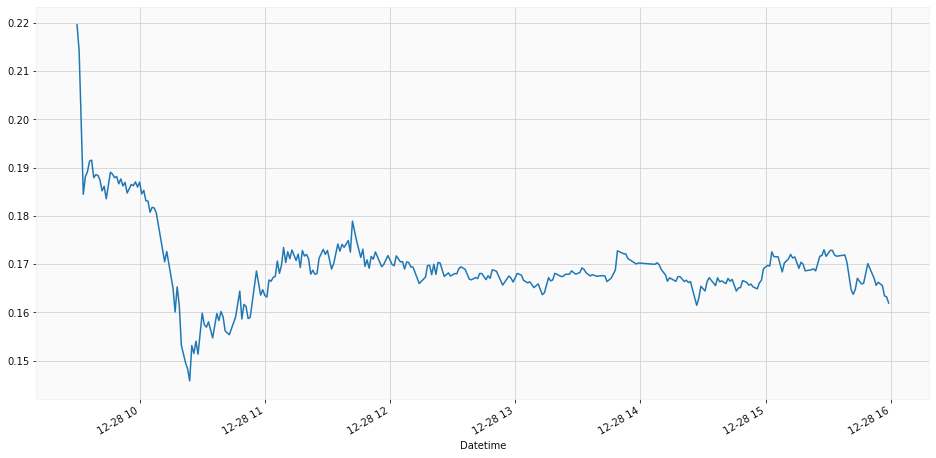

In [56]:
gbtc['Percent'].plot(figsize=(16,8))

In [58]:
btc, gbtc = get_crypto_and_stock('BTC-USD', 'GBTC', BTC_NAV, period='5y')
gbtc.iloc[-1]['Value'] / (1- gbtc['Percent'].quantile([0.1,0.15,0.2,0.25,0.3,0.4,0.5]))
# np.roots([0, (1- .22), gbtc.iloc[-1]['Value']])


0.10    29.649346
0.15    30.290766
0.20    30.785926
0.25    31.237854
0.30    31.726476
0.40    32.892930
0.50    34.567991
Name: Percent, dtype: float64

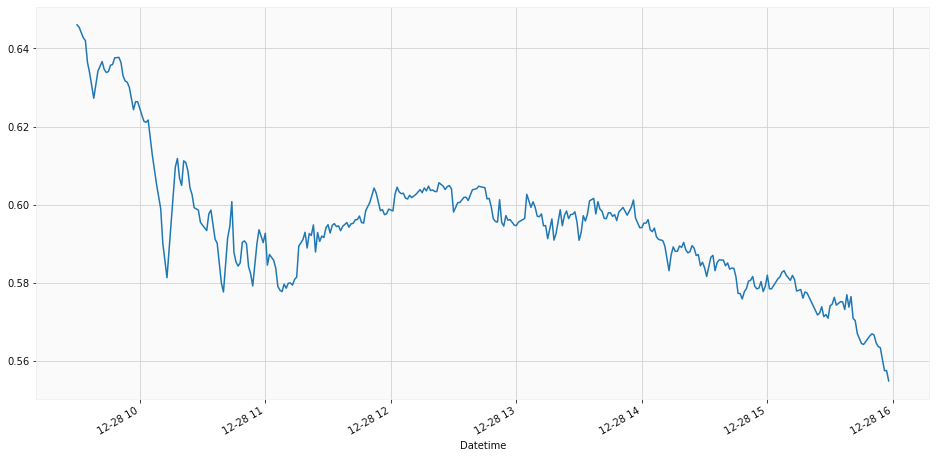

In [59]:
eth, ethe = get_crypto_and_stock('ETH-USD', 'ETHE', ETH_NAV, period='1d', interval='1m')
ethe['Percent'].plot(figsize=(16,8))

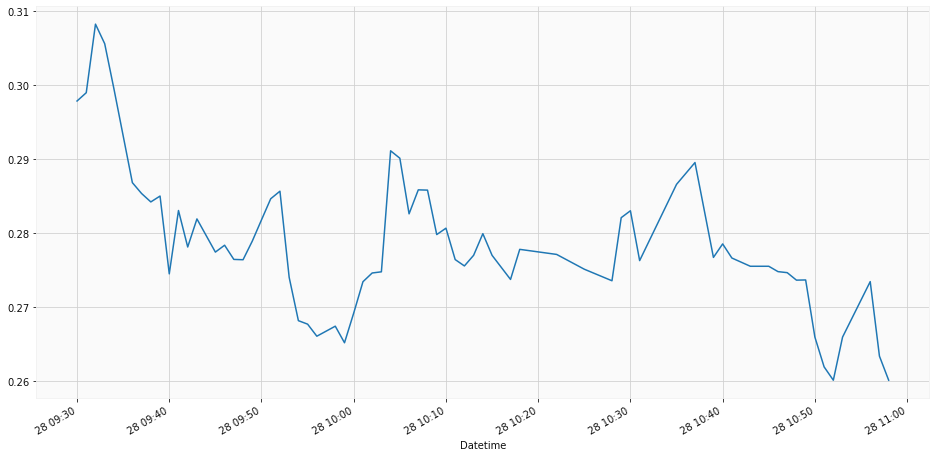

In [36]:
etc, etcg = get_crypto_and_stock('ETC-USD', 'ETCG', ETC_NAV, period='2d', interval='1m')
etcg['Percent'].plot(figsize=(16,8))

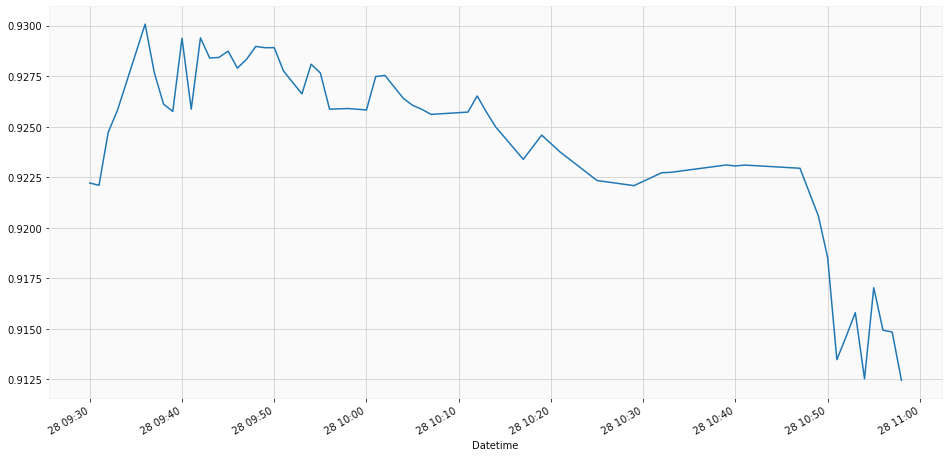

In [37]:
bch, bchg = get_crypto_and_stock('BCH-USD', 'BCHG', BCH_NAV, period='2d', interval='1m')
bchg['Percent'].plot(figsize=(16,8))

,Crypto Close,Stock Close,Crypto Percent,Stock Percent,Stock Gain
Crypto Close,1.000000,0.393851,0.112427,-0.085341,-0.096730
Stock Close,0.393851,1.000000,0.170907,0.015690,-0.001240
Crypto Percent,0.112427,0.170907,1.000000,0.076048,-0.023050
Stock Percent,-0.085341,0.015690,0.076048,1.000000,0.995086
Stock Gain,-0.096730,-0.001240,-0.023050,0.995086,1.000000


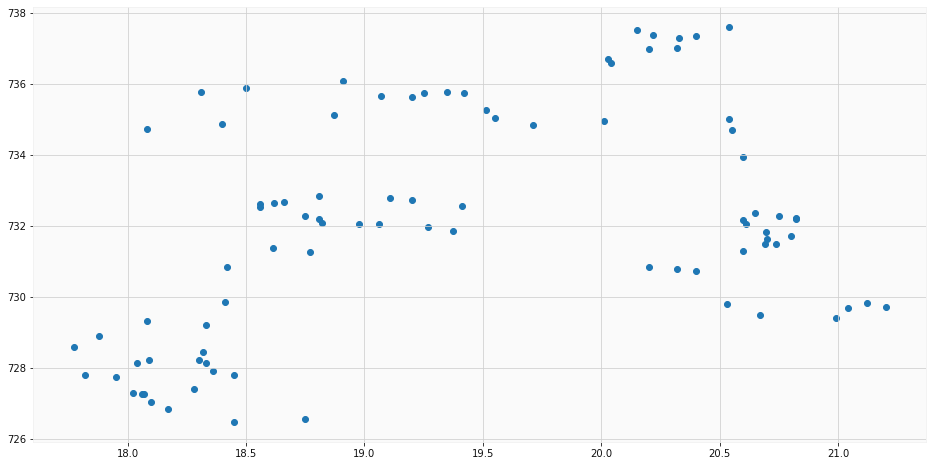

In [38]:
df = get_close_prices(eth, ethe)
plt.figure(figsize=(16,8))
plt.scatter(df['Stock Close'], df['Crypto Close'])
df.corr()

count    98.000000
mean      2.041394
std       0.933101
min       0.431448
25%       1.365319
50%       1.797782
75%       2.566133
max       4.461026
Name: Percent SP, dtype: float64

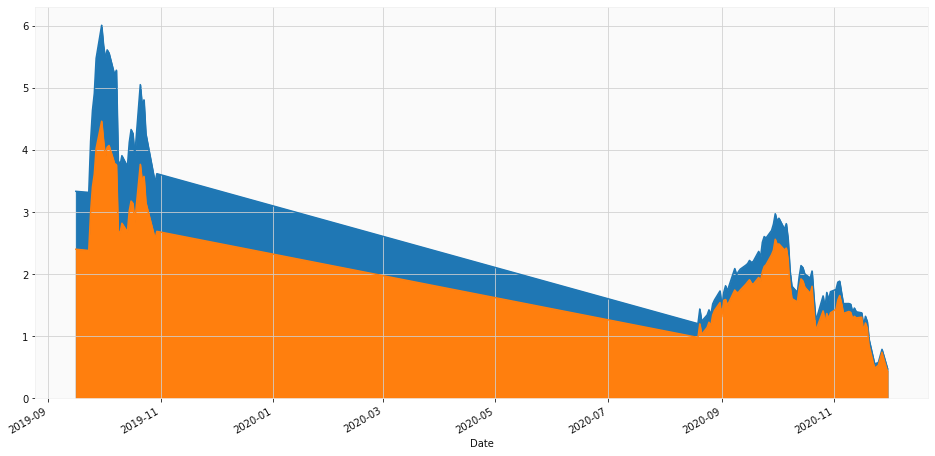

In [62]:
eth, ethe = get_crypto_and_stock('ETH-USD', 'ETHE', ETH_NAV, period='3y')
df = buy_at_25(ethe, spy, cost=10000)
df['Percent Cost'].plot(kind='area', figsize=(16, 8))
df['Percent SP'].plot(kind='area', figsize=(16, 8))
df['Percent SP'].describe()

            Percent Cost  Percent SP   Percent     Close     Value
Date                                                              
2020-09-14      2.417769    2.084737  0.277259  5.377778  3.886741
2020-09-15      2.446250    2.126158  0.295246  5.333333  3.758687
2020-09-16      2.501693    2.163846  0.281998  5.248889  3.768712
2020-09-17      2.467197    2.105125  0.243970  5.301111  4.007797
2020-09-18      2.482526    2.082947  0.249714  5.277778  3.959843
2020-09-21      2.659734    2.203765  0.298879  5.022222  3.521186
2020-09-22      2.557419    2.145913  0.313062  5.166667  3.549178
2020-09-23      2.819441    2.299295  0.313670  4.812222  3.302772
2020-09-24      2.919905    2.395103  0.232402  4.688889  3.599181
2020-09-25      2.894068    2.427252  0.231339  4.720000  3.628081
2020-09-28      3.025797    2.602039  0.199044  4.565556  3.656810
2020-09-29      3.135500    2.680043  0.165598  4.444445  3.708455
2020-09-30      3.319060    2.872528  0.128419  4.255556  3.70

count    71.000000
mean      1.785305
std       0.513661
min       0.556806
25%       1.477629
50%       1.763900
75%       2.094931
max       2.872528
Name: Percent SP, dtype: float64

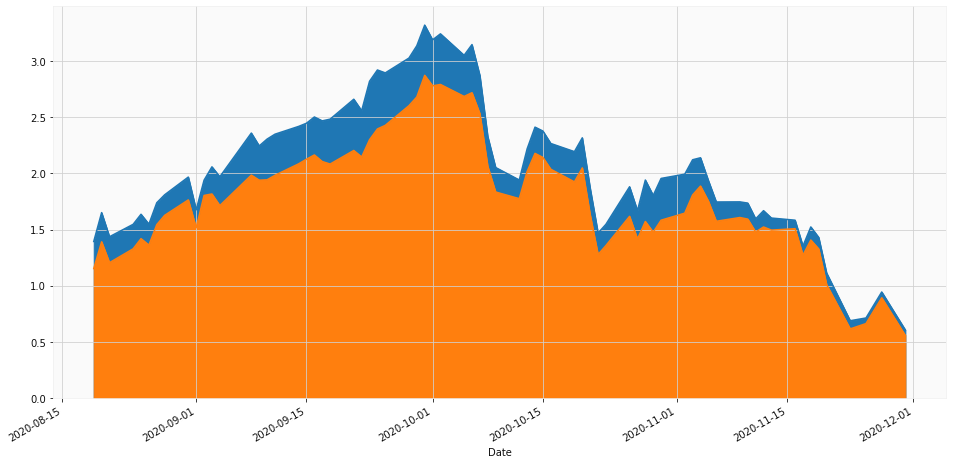

In [40]:
df1 = df.loc[df.index.year >= 2020]
df1['Percent Cost'].plot(kind='area', figsize=(16, 8))
df1['Percent SP'].plot(kind='area', figsize=(16, 8))
columns = ['Percent Cost', 'Percent SP', 'Percent', 'Close', 'Value']
print(df1[df1['Percent SP'] >= 2][columns])
print(df1[df1['Percent SP'] == df1['Percent SP'].min()][columns])
df1['Percent SP'].describe()

In [41]:
eth, ethe = get_crypto_and_stock('ETH-USD', 'ETHE', ETH_NAV, period='3y')
buy_strategy(ethe, [0.1, 0.2, 0.25, 0.3, 0.4, 0.5])

,Percent,Price
0.10,0.315847,11.181132
0.20,0.428643,13.388465
0.25,0.480700,14.730591
0.30,0.513588,15.726571
0.40,0.539233,16.601878
0.50,0.566580,17.649402


In [42]:
pd.set_option('display.max_rows', df.shape[0]+1)
df1.tail()

,Shares,Values,Values SP,Percent Cost,Percent SP,Open,High,Low,Close,Volume,Dividends,Stock Splits,Value,Percent
Date,,,,,,,,,,,,,,
2020-11-20,1150.159716,21139.934622,10511.507127,1.113993,1.011123,7.961111,8.784445,7.941667,8.694445,4027500.0,0.0,0.0,5.251547,0.395988
2020-11-23,918.883014,16889.069020,10448.872644,0.688907,0.616353,9.861111,11.158889,9.777778,10.882778,6985800.0,0.0,0.0,6.268482,0.424000
2020-11-25,932.159529,17133.091354,10299.050925,0.713309,0.663560,12.305555,12.333333,9.444445,10.727777,6249600.0,0.0,0.0,5.879391,0.451947
2020-11-27,1058.076682,19447.448530,10270.447267,0.944745,0.893535,9.416667,10.000000,9.111111,9.451111,3319200.0,0.0,0.0,5.331381,0.435899
2020-11-30,873.786392,16060.193144,10316.118042,0.606019,0.556806,11.638889,11.777778,11.001111,11.444445,3695400.0,0.0,0.0,6.334298,0.446518


In [60]:
btc, gbtc = get_crypto_and_stock('BTC-USD', 'GBTC', BTC_NAV, period='5y')
print('BTC:', btc.iloc[-1]['Close'], 'GBTC:', gbtc.iloc[-1]['Close'])
buy_strategy(gbtc, [0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5])

BTC: 26796.384765625 GBTC: 30.450000762939453


,Percent,Price
0.10,0.141176,29.659583
0.15,0.159362,30.301224
0.20,0.172882,30.796555
0.25,0.184848,31.248639
0.30,0.197403,31.737429
0.40,0.225865,32.904286
0.50,0.263377,34.579925


In [61]:
eth, ethe = get_crypto_and_stock('ETH-USD', 'ETHE', ETH_NAV, period='3y')
print('ETH:', eth.iloc[-1]['Close'], 'ETHE:', ethe.iloc[-1]['Close'])
buy_strategy(ethe, [0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5])

ETH: 733.8914184570312 ETHE: 16.899999618530273


,Percent,Price
0.10,0.315847,11.051303
0.15,0.364715,11.901388
0.20,0.428643,13.233006
0.25,0.480700,14.559548
0.30,0.513588,15.543963
0.40,0.539233,16.409107
0.50,0.566408,17.437520
